# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [30]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [33]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 0. EDA

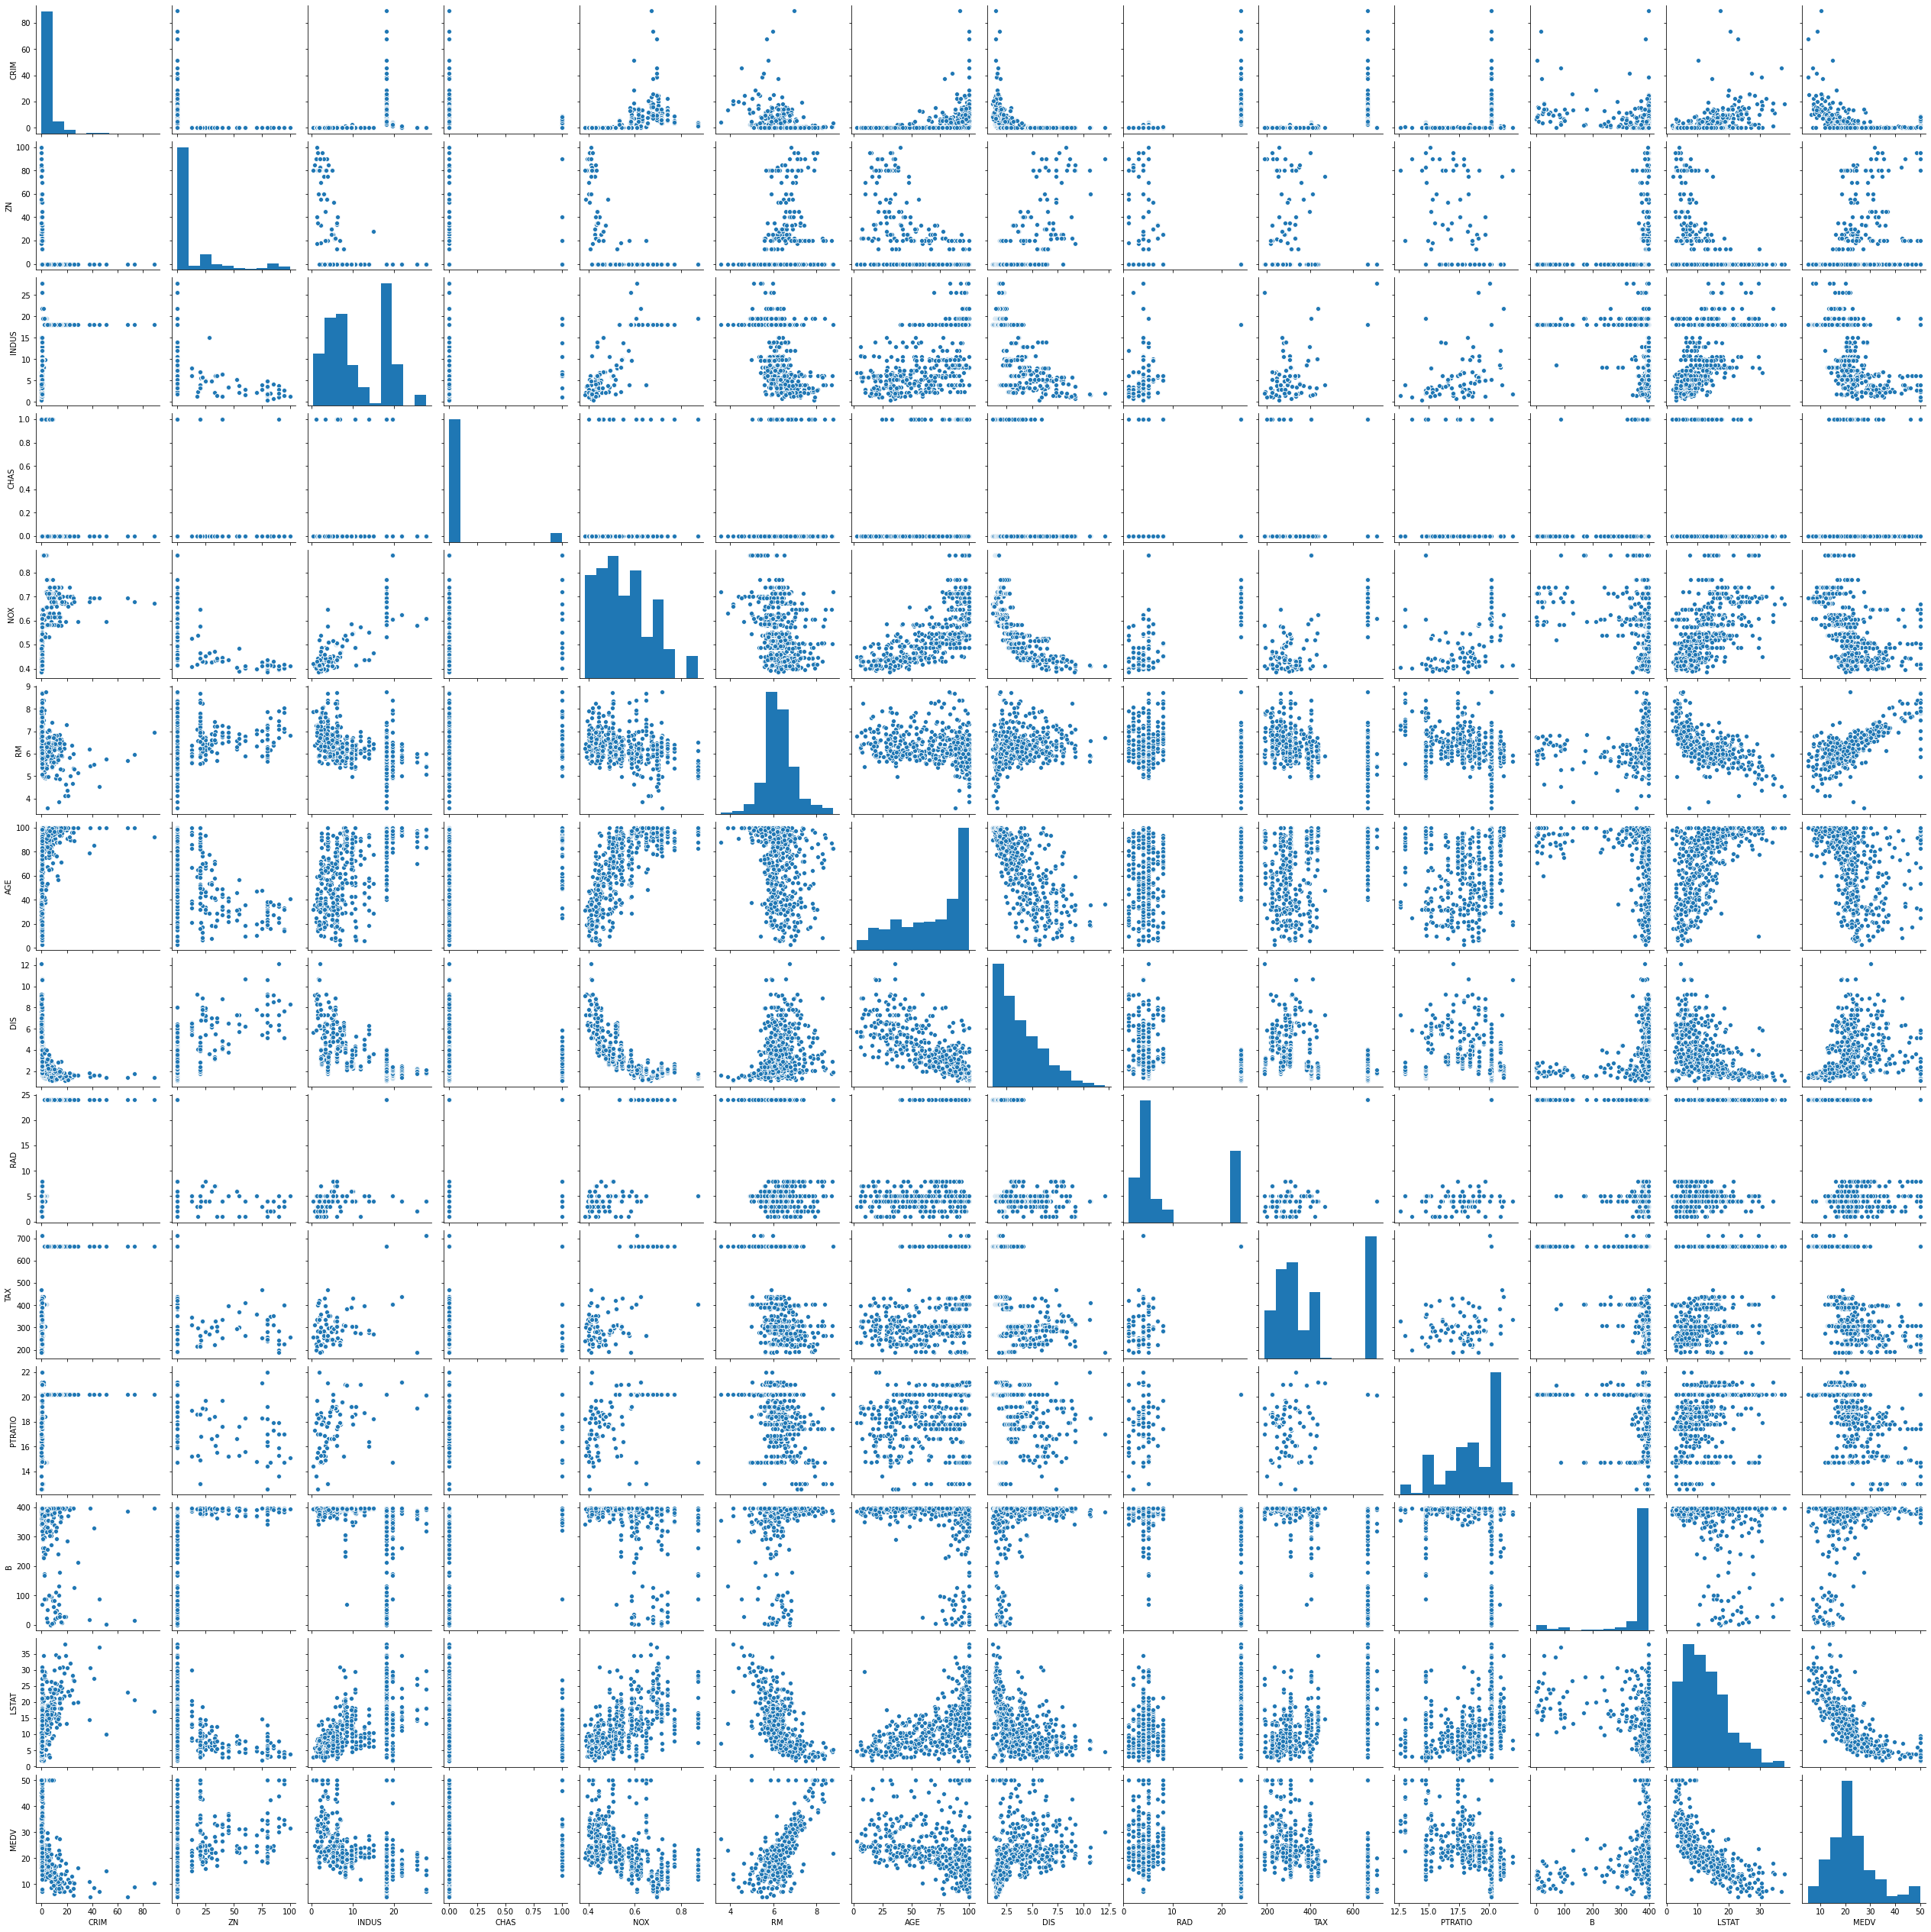

In [10]:
sns.pairplot(data)

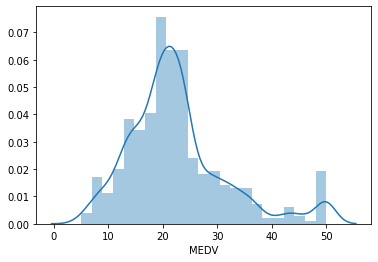

In [16]:
sns.distplot(data['MEDV'])

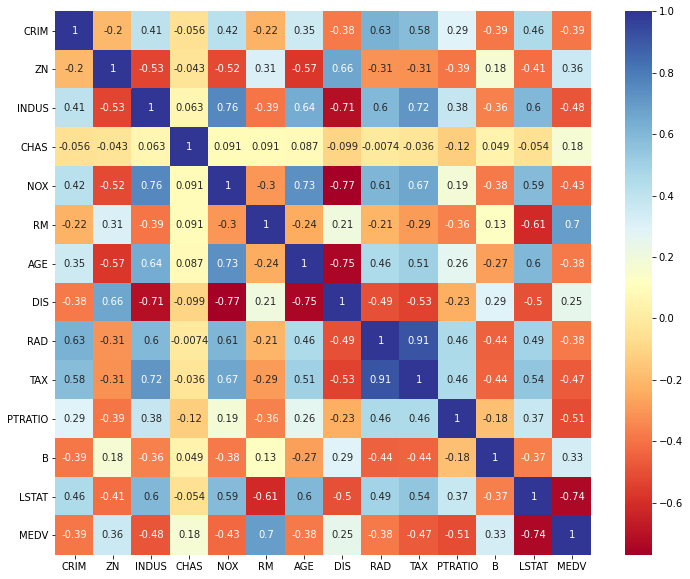

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlBu')

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
lm = LinearRegression()
reg = lm.fit(X_train, y_train)

In [23]:
print('score ',reg.score(X, y))
print('coef ',reg.coef_)
print('intercept ', reg.intercept_)

0.7373174609424278
[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]
[30.24675099]


In [27]:
coeff_df = pd.DataFrame(reg.coef_.T,
                        X_train.columns,
                        columns=['Coefficients'],
                       )
coeff_df

,Coefficients
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


## 3. Calculate and print R-squared for both the training and the testing set.

In [35]:
predictions = lm.predict(X_test)
#  predictions

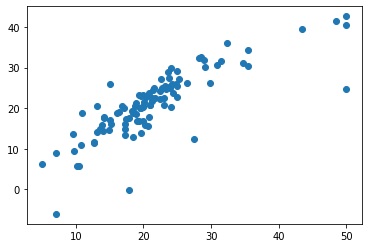

In [36]:
# Scatterplot test-data vs. predictions

plt.scatter(y_test, predictions)

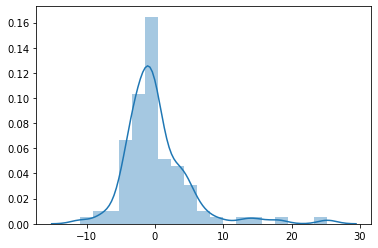

In [37]:
# Distribution of the errors
sns.distplot(y_test-predictions)

In [ ]:
# Only roughly normally distributed, maybe model not good enough


In [40]:
# R² values
# for training
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)

print(r2_score(y_train, predictions_train))
print(r2_score(y_test, predictions_test))


0.7508856358979673
0.6687594935356329


## 4. Calculate and print mean squared error for both the training and the testing set.

In [44]:
print('RSME train: ', metrics.mean_squared_error(y_train, predictions_train))
print('RSME test: ', metrics.mean_squared_error(y_test, predictions_test))

RSME train:  21.641412753226312
RSME test:  24.291119474973456


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [45]:
print('MAE train: ', metrics.mean_absolute_error(y_train, predictions_train))
print('MAE test: ', metrics.mean_absolute_error(y_test, predictions_test))

MAE train:  3.3147716267832226
MAE test:  3.1890919658878287


## Classification Model Evaluation

In [51]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [57]:
lm = LogisticRegression()
reg = lm.fit(X_train, y_train)

/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/flo/anaconda3/envs/ironhack/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
y_train.T

,22,15,65,11,42,146,51,27,4,32,...,87,74,121,149,20,71,106,14,92,102
class,0,0,1,0,0,2,1,0,0,0,...,1,1,2,2,0,1,2,0,1,2


## 8. Calculate and print the accuracy score for both the training and the testing set.

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

## 10. Calculate and print the precision score for both the training and the testing set.

## 11. Calculate and print the recall score for both the training and the testing set.

## 12. Calculate and print the F1 score for both the training and the testing set.

## 13. Generate confusion matrices for both the training and the testing set.

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.